## Parte I. SVD & PCA

Lauro Reyes Rosas \
Claudia Ximena Paz Cendejas

*Análisis de Componentes Principales (PCA)*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/winequality-red.csv")

1. Prepara los datos: para cada variable, centra alrededor del cero restando las medias y estandariza la
escala dividiendo entre la varianza (np.std). Haz un mapa de calor con la matriz de correlaciones de la
base de datos estandarizada.

In [3]:
df_standardized = (df - df.mean()) / df.std()

correlation_matrix = df_standardized.corr()

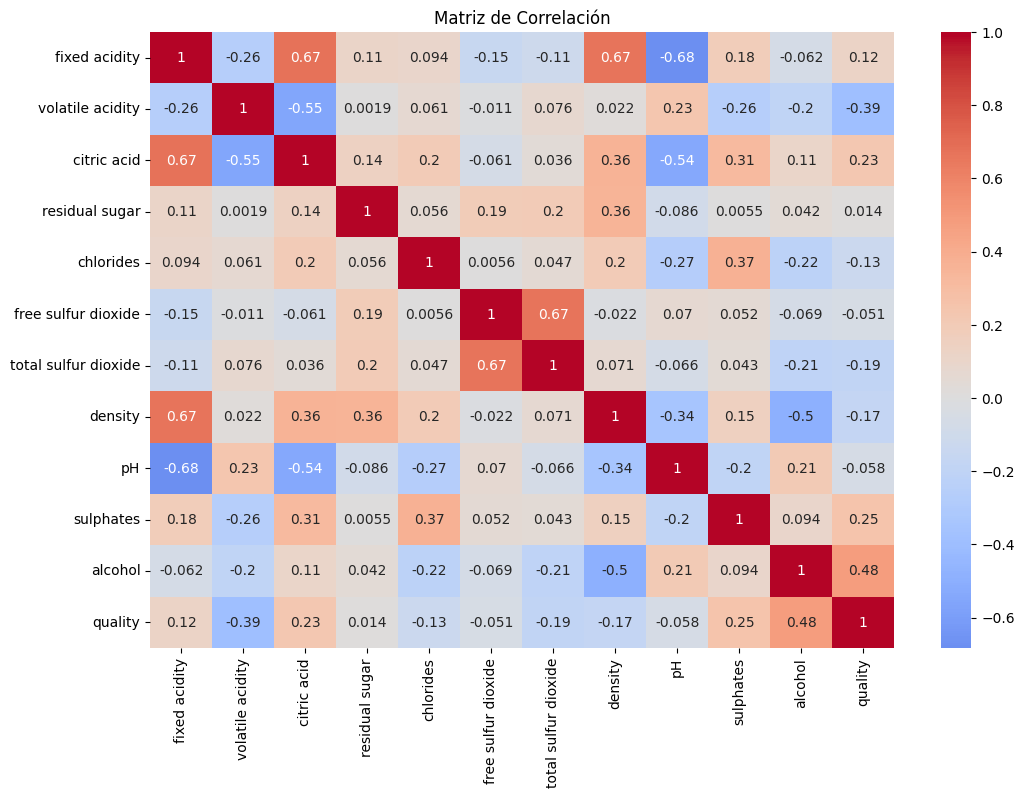

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

2. Realiza la reducción de dimensionalidad mediante PCA calculando los eigenvalores y eigenvectores de
la matriz de varianza-covarianza ($A^{T}$ A).

In [5]:
cov_matrix = np.cov(df_standardized.T)

# valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Valores propios:")
print(eigenvalues)
print("\nVectores propios:")
print(eigenvectors)


Valores propios:
[3.1211677  2.24188204 1.68291969 1.21502087 0.97326362 0.05951792
 0.18021863 0.32791939 0.41130754 0.50587256 0.6183178  0.66259224]

Vectores propios:
[[ 0.48788336 -0.00417321 -0.16482854 -0.23109808 -0.07877938 -0.63857976
  -0.25643792  0.18295601 -0.17457815 -0.20052866  0.30721496 -0.0555313 ]
 [-0.26512898  0.33896786 -0.22708884  0.04185824  0.29937933 -0.00466168
   0.37716123 -0.15510563 -0.06022334 -0.14612614  0.62623369 -0.297287  ]
 [ 0.47333547 -0.1373581   0.10022856 -0.0567358  -0.12014871  0.07003691
   0.62432783 -0.34608556 -0.22097505 -0.29633271 -0.24414858 -0.13663328]
 [ 0.13915442  0.16773634  0.24362014 -0.38303758  0.70936319 -0.18364637
   0.08807787  0.05223656  0.27818728  0.17062614 -0.28385429 -0.10931059]
 [ 0.19742679  0.18978819 -0.02660785  0.65477782  0.26623723 -0.05393118
  -0.20861667  0.00386273 -0.41993639  0.18692254 -0.23054697 -0.33733656]
 [-0.04588071  0.25948314  0.61611132 -0.03371148 -0.15941286  0.05192167
   0.23793

3. Calcula la varianza total acumulada en las primeras k componentes principales.

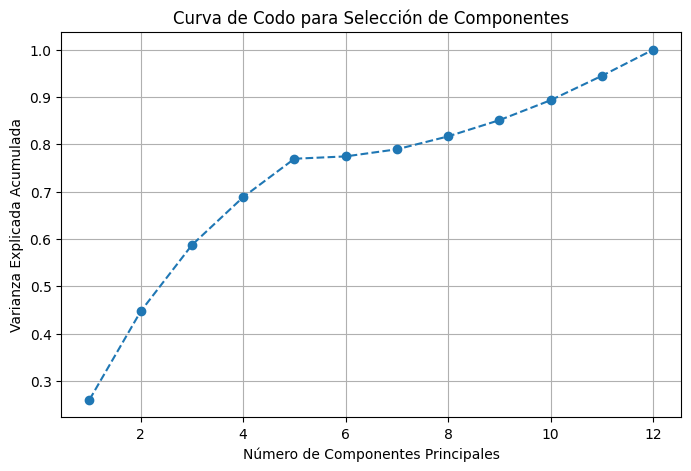

Número de componentes seleccionados para explicar al menos el 95% de la varianza: 12
Datos con dimensionalidad reducida:
[[-1.77888507  1.15694121 -1.38614692 ... -0.04030734  0.11049301
   0.97667713]
 [-1.00387062  2.07118989  0.00775634 ...  0.17665867  1.37635916
  -0.65756901]
 [-0.91549679  1.39299841 -0.69906772 ...  0.08865889  0.72011277
  -0.25474328]
 ...
 [-1.36583781 -0.51739913  1.25030522 ...  0.12111645  0.19597753
   0.55198938]
 [-2.36640641  0.70332476  0.89920089 ... -0.60721025 -0.12662937
   0.80550052]
 [-0.28868597 -1.24045778  1.21771422 ...  0.11538553 -1.44296301
   0.20286147]]


In [7]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Codo para Selección de Componentes')
plt.grid()
plt.show()

# Componentes que explican 95% de varianza
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes seleccionados para explicar al menos el 95% de la varianza: {num_components}")

# Proyección
selected_eigenvectors = eigenvectors[:, :num_components]
reduced_data = np.dot(df_standardized, selected_eigenvectors)

print("Datos con dimensionalidad reducida:")
print(reduced_data)


4. Analizando la forma de calcular la proyección (Y = AV), identifica los coeficientes de cada variable en las
primeras componentes principales. Discute lo observado: ¿cuáles son las variables que más contribuyen
con cada componente? Compara estos resultados con la matriz de correlaciones del paso 1

In [8]:
components = selected_eigenvectors
coefficients = pd.DataFrame(components, index=df.columns, columns=[f'Componente {i+1}' for i in range(num_components)])

print("Cargas de las variables en las primeras componentes principales:")
print(coefficients)


Cargas de las variables en las primeras componentes principales:
                      Componente 1  Componente 2  Componente 3  Componente 4  \
fixed acidity             0.487883     -0.004173     -0.164829     -0.231098   
volatile acidity         -0.265129      0.338968     -0.227089      0.041858   
citric acid               0.473335     -0.137358      0.100229     -0.056736   
residual sugar            0.139154      0.167736      0.243620     -0.383038   
chlorides                 0.197427      0.189788     -0.026608      0.654778   
free sulfur dioxide      -0.045881      0.259483      0.616111     -0.033711   
total sulfur dioxide      0.004067      0.363971      0.540732     -0.028460   
density                   0.370301      0.330781     -0.168723     -0.200693   
pH                       -0.432721     -0.065440      0.069771     -0.005466   
sulphates                 0.254535     -0.109334      0.212913      0.560502   
alcohol                  -0.073177     -0.502709      0

5. Grafica los datos en el(los) plano(s) de las primeras componentes principales, las que hayas elegido de
acuerdo al criterio del paso 3. Colorea los puntos con sus categorías correspondientes: diagnóstico,
calidad o tipo de actividad, respectivamente. Discute: ¿la reducción de dimensionalidad parece facilitar
tareas de clasificación de los datos?

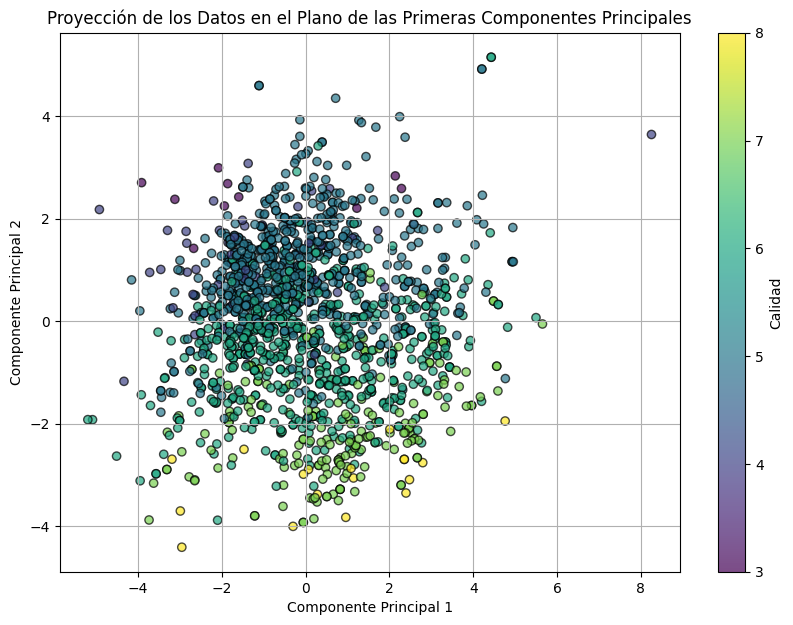

In [9]:
#Solo se usaran las 2 primeras componentes
df_reduced = pd.DataFrame(reduced_data[:, :2], columns=['Componente 1', 'Componente 2'])
df_reduced['Categoría'] = df['quality']  # Cambia 'quality' según la categoría que desees visualizar

# Graficar los datos proyectados
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_reduced['Componente 1'], df_reduced['Componente 2'], c=df_reduced['Categoría'],
                      cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Calidad')  # Cambia el título de la barra de color si usas otra variable
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de los Datos en el Plano de las Primeras Componentes Principales')
plt.grid(True)
plt.show()


6. Grafica las variables en el espacio latente: el de sus coeficientes en cada una de las componentes principales.
Interpreta.


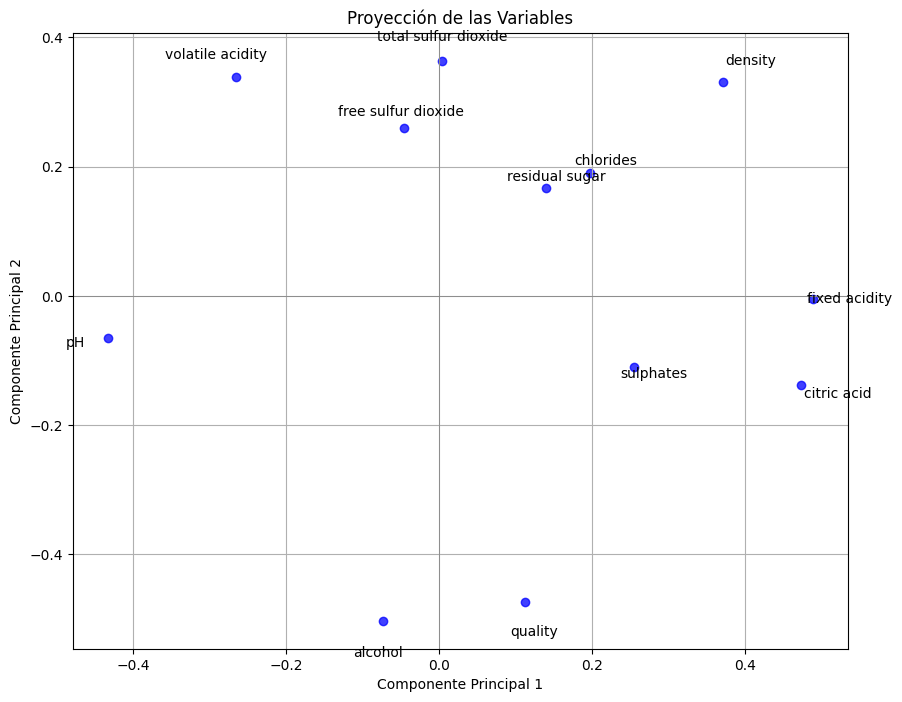

In [10]:
plt.figure(figsize=(10, 8))

plt.scatter(coefficients.iloc[:, 0], coefficients.iloc[:, 1], color='b', alpha=0.75)
for i, variable in enumerate(df.columns):
    plt.text(coefficients.iloc[i, 0] * 1.1, coefficients.iloc[i, 1] * 1.1, variable, color='black', ha='center', va='center')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de las Variables')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid()
plt.show()


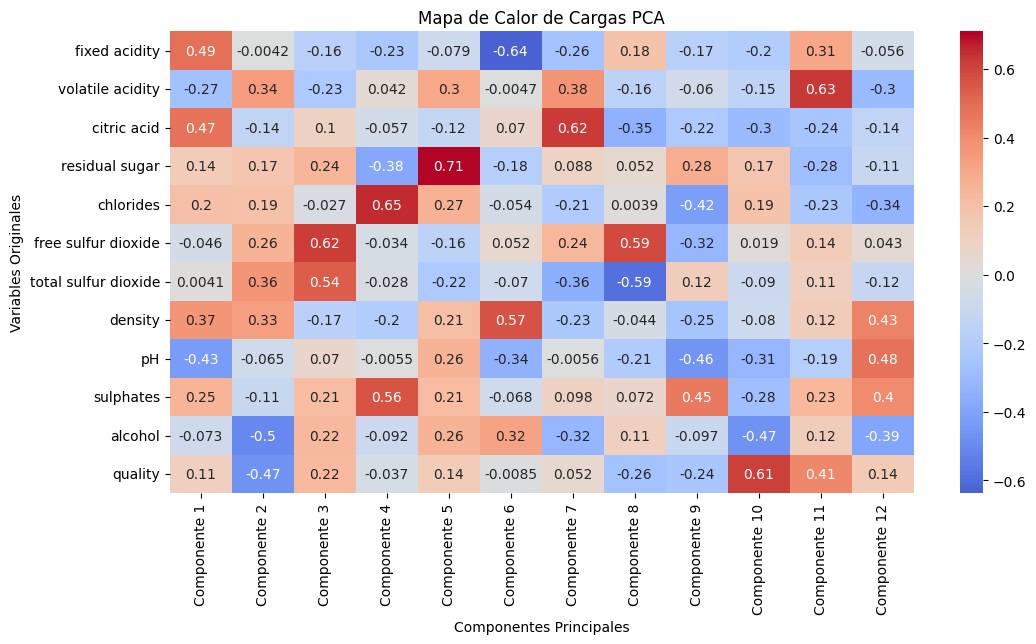

In [ ]:
# Mapa de calor con todos los componentes
coefficients.index.name = "Variables Originales"
coefficients.columns = [f"Componente {i+1}" for i in range(coefficients.shape[1])]
plt.figure(figsize=(12, 6))
sns.heatmap(coefficients, annot=True, cmap="coolwarm", center=0)
plt.title('Mapa de Calor de Cargas PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables Originales')
plt.show()


## Parte II. Mínimos cuadrados

*Regresión generalizada*

Dados n puntos $(x_i,y_i)$, el objetivo es encontrar el polinomio de grado máximo $p$ que minimize la suma de los errores cuadrados:
$$min\sum_{i=1}^{n}(y_i-f(x_i))^2$$
Discute los casos:
$$f(x)=a_0+a_1x+a_2x^2+\dots+a_px^p$$
$$f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$$

---
Generamos datos sintéticos con ruido en dos funciones, una que ajuste $f(x)=a_0+a_1x+a_2x^2+\dots+a_px^p$ y otra $f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$, las cuales serán:
1. $y = 2 + 3x - x^2$
2. $y = 2 + 3cos(x) - cos(2x)$


In [6]:
n = 100  # Número de puntos de datos
x = np.linspace(0, 10, n)
y = 2 + 3 * x - 1 * x**2
noise = np.random.normal(0, 2, size=n)
y_cosine = 2 + 3 * np.cos(x) + -1 * np.cos(2 * x)
y = y + noise
y_cosine = y_cosine + noise

Visualizamos cómo son los datos para ambas funciones

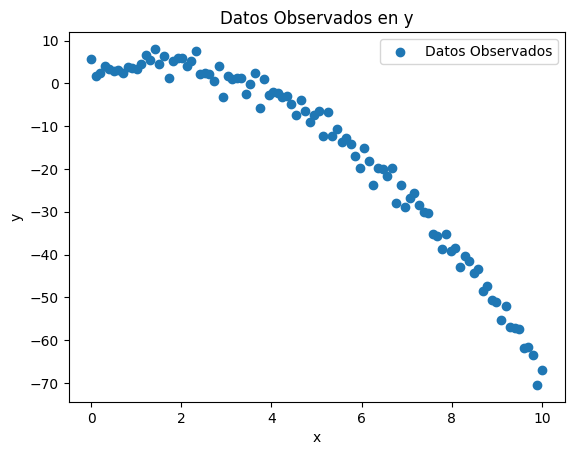

In [7]:
plt.scatter(x, y, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados en y')
plt.legend()
plt.show()

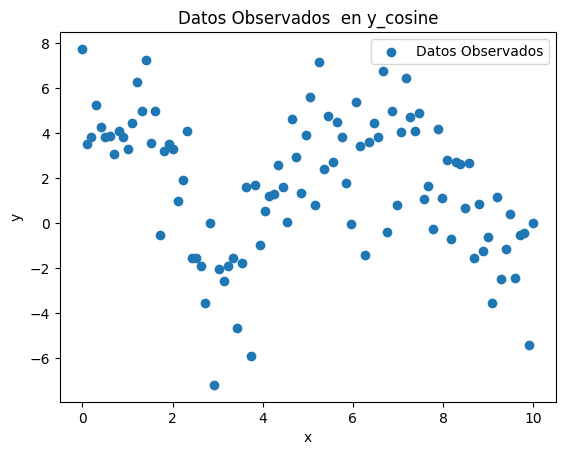

In [8]:
plt.scatter(x, y_cosine, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados  en y_cosine')
plt.legend()
plt.show()

In [9]:
def polynomial_fit(x, y, p):
    """
    Ajusta un polinomio de grado p a los datos dados y devuelve los valores ajustados y los coeficientes.

    Args:
        x (array-like): Valores independientes.
        y (array-like): Valores dependientes.
        p (int): Grado del polinomio.

    Returns:
        tuple: y_fit (valores ajustados) y coefficients (coeficientes del polinomio).
    """
    # Inicializar la matriz de diseño A
    A = np.zeros((len(x), p + 1))
    for i in range(len(x)):
        for j in range(p + 1):
            A[i, j] = x[i] ** j
    # calcular coeficientes del polinomio
    AtA = A.T @ A
    AtY = A.T @ y
    coefficients = np.linalg.solve(AtA, AtY)
    # calcular el valor de y con los coeficientes obtenidos
    def polynomial(x_vals, coeffs):
        y_vals = np.zeros_like(x_vals)
        for j, a_j in enumerate(coeffs):
            y_vals += a_j * x_vals ** j
        return y_vals
    y_fit = polynomial(x, coefficients)

    return y_fit, coefficients

In [10]:
def cosine_series_fit(x, y, p):
    """
    Ajusta una seri coseno de grado p a los datos dados y devuelve los valores ajustados y los coeficientes.

    Args:
        x (array-like): Valores independientes.
        y (array-like): Valores dependientes.
        p (int): Grado de la serie.

    Returns:
        tuple: y_fit (valores ajustados) y coefficients (coeficientes de la serie).
    """
    # Inicializar la matriz de diseño A
    A = np.zeros((len(x), p + 1))
    for i in range(len(x)):
        for j in range(p + 1):
            A[i, j] = np.cos(j * x[i])
    # calcular coeficientes del polinomio
    AtA = A.T @ A
    AtY = A.T @ y
    coefficients = np.linalg.solve(AtA, AtY)
    # calcular el valor de y con los coeficientes obtenidos
    def cosine_series(x_vals, coeffs):
        y_vals = np.zeros_like(x_vals)
        y_vals += coeffs[0]  # Agregar el término constante a_0
        for j in range(1, len(coeffs)):
            y_vals += coeffs[j] * np.cos(j * x_vals)
        return y_vals
    y_fit = cosine_series(x, coefficients)

    return y_fit, coefficients

Visualizamos el ajuste de diferentes polinomios para los datos de $y$

Coeficientes:  [ 3.07924725  2.42421994 -0.94848297]
Suma de Errores Cuadrados para el Ajuste Polinómico: 380.72348781172815


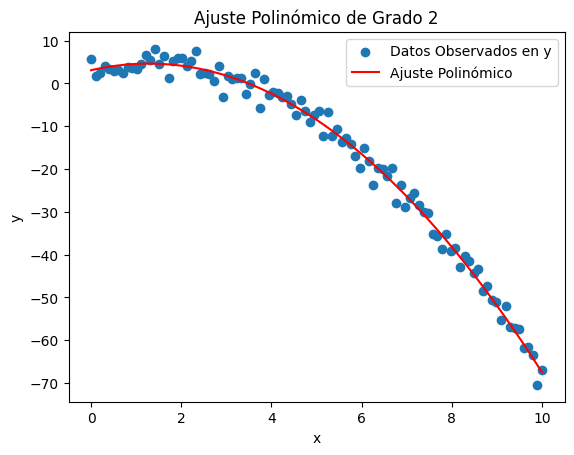

In [11]:
p = 2 # grado del polinomio
y_fit_poly, coefficients = polynomial_fit(x,y,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste polinómico
residuals = y - y_fit_poly
sse_poly = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Polinómico:", sse_poly)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y, label='Datos Observados en y')
plt.plot(x, y_fit_poly, 'r', label='Ajuste Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Grado {}'.format(p))
plt.legend()
plt.show()


Coeficientes:  [ 4.60076896e+00 -1.44759833e+01  4.89457219e+01 -9.47451697e+01
  1.18569500e+02 -9.14800011e+01  4.36400603e+01 -1.29930269e+01
  2.34149803e+00 -2.17518813e-01  1.19065208e-03  1.52137473e-03
 -2.39717946e-05 -1.93377381e-05  1.53786873e-06  5.64489361e-08
 -1.80808258e-08  1.97057606e-09 -1.54857647e-10  7.47380692e-12
 -1.53489523e-13]
Suma de Errores Cuadrados para el Ajuste Polinómico: 353.17314368733156


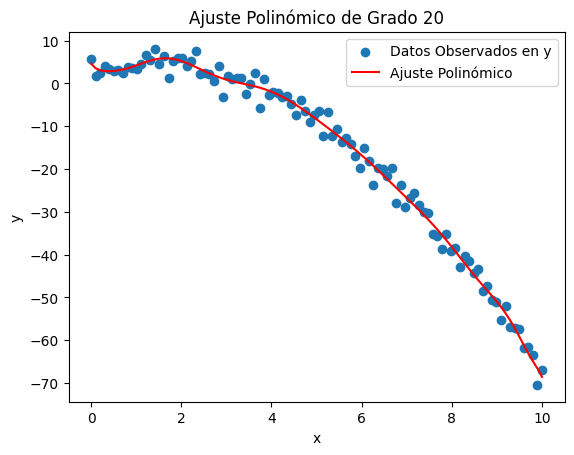

In [12]:
p = 20
y_fit_poly, coefficients = polynomial_fit(x,y,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste polinómico
residuals = y - y_fit_poly
sse_poly = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Polinómico:", sse_poly)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y, label='Datos Observados en y')
plt.plot(x, y_fit_poly, 'r', label='Ajuste Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Grado {}'.format(p))
plt.legend()
plt.show()


Ahora para las series de coseno

Coeficientes:  [ 1.93215307  2.80411998 -1.31264802]
Suma de Errores Cuadrados para el Ajuste Serie Coseno: 392.6763066600376


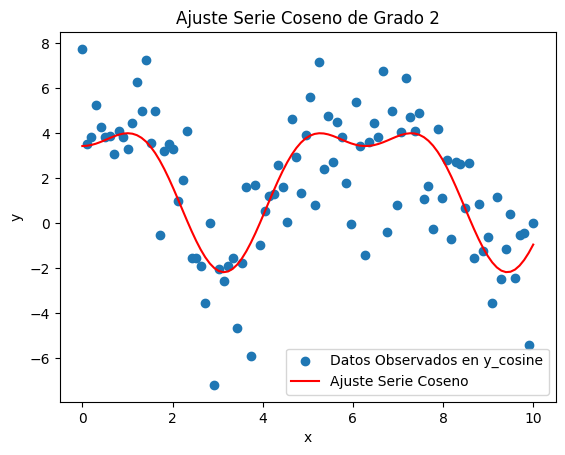

In [13]:
p = 2 # grado de la serie
y_fit_cosine, coefficients = cosine_series_fit(x,y_cosine,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste Serie Coseno
residuals = y_cosine - y_fit_cosine
sse_cosine = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Serie Coseno:", sse_cosine)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y_cosine, label='Datos Observados en y_cosine')
plt.plot(x, y_fit_cosine, 'r', label='Ajuste Serie Coseno')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Serie Coseno de Grado {}'.format(p))
plt.legend()
plt.show()


Coeficientes:  [ 1.94729887  2.78302587 -1.29858529  0.12456089 -0.15225403  0.12138208
  0.54575028 -0.24330504  0.0473063  -0.0551247  -0.18357433 -0.08248266
 -0.01395928 -0.06994934 -0.08179421 -0.12863626  0.22096399 -0.35862857
 -0.31476303  0.15184386  0.23809057]
Suma de Errores Cuadrados para el Ajuste Serie Coseno: 351.8275022801012


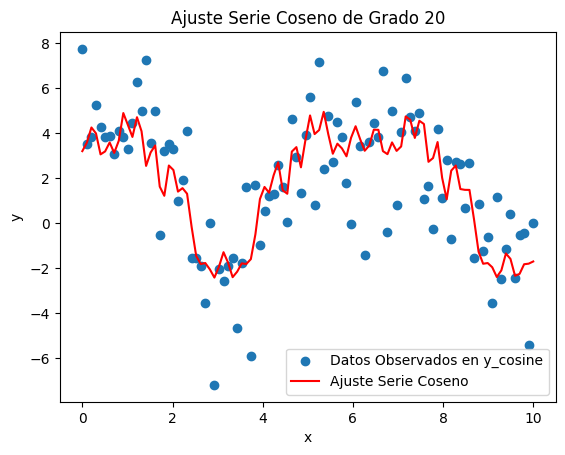

In [14]:
p = 20
y_fit_cosine, coefficients = cosine_series_fit(x,y_cosine,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste Serie Coseno
residuals = y_cosine - y_fit_cosine
sse_cosine = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Serie Coseno:", sse_cosine)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y_cosine, label='Datos Observados en y_cosine')
plt.plot(x, y_fit_cosine, 'r', label='Ajuste Serie Coseno')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Serie Coseno de Grado {}'.format(p))
plt.legend()
plt.show()
